In [175]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np

In [176]:
file = '../Resources/Contributions_2013.csv'
IC_2013 = pd.read_csv(file,index_col='CandidateName')
uncleaned = pd.read_csv(file,index_col=False)
IC_2013.head()

/Users/Abir/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Election,CandidateID,Date,Name,ContributerType,BoroughName,City,State,ZipCode,ContributionState,Amount,MatchAmt,PrevAmt,PayMethod,TotalAmount
CandidateName,,,,,,,,,,,,,,,,
"Coenen, Jr., Kevin P",0,2013,1286,1/25/2013,"Coenen, Kevin P",Candidate,Other,Nesconset,NY,11767.0,NY,10.0,0.0,0.0,Credit Card,10.0
"Coenen, Jr., Kevin P",1,2013,1286,4/17/2013,"Walter, Dorsey",Individual,Manhattan,New York,NY,10150.0,NaN,175.0,175.0,0.0,Credit Card,350.0
"Coenen, Jr., Kevin P",2,2013,1286,1/25/2013,"Coenen, Kevin P",Candidate,Other,Nesconset,NY,11767.0,NaN,-10.0,0.0,0.0,Unknown,-10.0
"Marks, Philip A",3,2013,1551,2/13/2012,"Marks, Philip",Candidate,Brooklyn,Brooklyn,NY,11236.0,NY,400.0,175.0,0.0,Check,575.0
"Marks, Philip A",4,2013,1551,2/28/2013,"Marks, Philip",Candidate,Brooklyn,Brooklyn,NY,11236.0,NY,100.0,0.0,400.0,Cash,500.0


In [177]:
IC_2013['ZipCode'] = IC_2013['ZipCode'].apply(str)

In [178]:
IC_2013_df = IC_2013.drop(columns=['ContributionState','PayMethod','Name','CandidateID','Unnamed: 0','Election','BoroughName','PrevAmt'])
total_groupby = IC_2013_df.groupby(['CandidateName']).sum(['TotalAmount']).sort_values('TotalAmount',ascending=False)
total_groupby 

,Amount,MatchAmt,TotalAmount
CandidateName,,,
"de Blasio, Bill",11073226.59,926504.0,1.497036e+07
"Quinn, Christine C",8206058.97,689206.0,1.209154e+07
"Thompson, Jr., William C",4911412.70,417722.0,6.111452e+06
"Lhota, Joseph J",3534348.21,592210.0,4.981273e+06
"Hidary, Jack D",589596.67,75302.0,6.760667e+05
"Salgado, Erick J",363565.09,41929.0,4.948541e+05
"Liu, John C",239200.00,0.0,4.045000e+05
"Weiner, Anthony D",225088.74,0.0,2.301887e+05
"Albanese, Sal F",27178.00,0.0,3.092800e+04


<AxesSubplot:xlabel='CandidateName'>

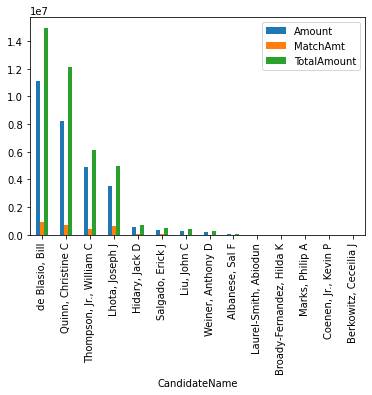

In [179]:
total_groupby.plot.bar()

In [180]:
outcome = []
for i in uncleaned['CandidateName']:
    if i == 'de Blasio, Bill':
        outcome.append('W')
    else:
        outcome.append('L')

IC_2013_df['Outcome'] = outcome
IC_2013_df.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Coenen, Jr., Kevin P",1/25/2013,Candidate,Nesconset,NY,11767.0,10.0,0.0,10.0,L
"Coenen, Jr., Kevin P",4/17/2013,Individual,New York,NY,10150.0,175.0,175.0,350.0,L
"Coenen, Jr., Kevin P",1/25/2013,Candidate,Nesconset,NY,11767.0,-10.0,0.0,-10.0,L
"Marks, Philip A",2/13/2012,Candidate,Brooklyn,NY,11236.0,400.0,175.0,575.0,L
"Marks, Philip A",2/28/2013,Candidate,Brooklyn,NY,11236.0,100.0,0.0,500.0,L


In [181]:
IC_2013_df['Date'] = pd.to_datetime(IC_2013_df['Date'])
IC_2013_df.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Coenen, Jr., Kevin P",2013-01-25,Candidate,Nesconset,NY,11767.0,10.0,0.0,10.0,L
"Coenen, Jr., Kevin P",2013-04-17,Individual,New York,NY,10150.0,175.0,175.0,350.0,L
"Coenen, Jr., Kevin P",2013-01-25,Candidate,Nesconset,NY,11767.0,-10.0,0.0,-10.0,L
"Marks, Philip A",2012-02-13,Candidate,Brooklyn,NY,11236.0,400.0,175.0,575.0,L
"Marks, Philip A",2013-02-28,Candidate,Brooklyn,NY,11236.0,100.0,0.0,500.0,L


In [182]:
IC_2013_df.isnull().count()

Date               47777
ContributerType    47777
City               47777
State              47777
ZipCode            47777
Amount             47777
MatchAmt           47777
TotalAmount        47777
Outcome            47777
dtype: int64

In [183]:
# IC_2013_df = IC_2013_df.dropna()
# IC_2013_df.isnull().sum()

In [184]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
IC_2013_df_enc = IC_2013_df.copy()
le = LabelEncoder()
IC_2013_df_enc['Date'] = le.fit_transform(IC_2013_df['Date'])
IC_2013_df_enc['ContributerType'] = le.fit_transform(IC_2013_df['ContributerType'])
IC_2013_df_enc['City'] = le.fit_transform(IC_2013_df['City'])
IC_2013_df_enc['Amount'] = le.fit_transform(IC_2013_df['Amount'])
IC_2013_df_enc['State'] = le.fit_transform(IC_2013_df['State'])
IC_2013_df_enc['ZipCode'] = le.fit_transform(IC_2013_df['ZipCode'])
IC_2013_df_enc['MatchAmt'] = le.fit_transform(IC_2013_df['MatchAmt'])
# IC_2013_df_enc['PrevAmt'] = le.fit_transform(IC_2013_df['PrevAmt'])
IC_2013_df_enc['TotalAmount'] = le.fit_transform(IC_2013_df['TotalAmount'])
IC_2013_df_enc['Outcome'] = le.fit_transform(IC_2013_df['Outcome'])
IC_2013_df_enc.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Coenen, Jr., Kevin P",1119,0,1573,51,512,121,0,121,0
"Coenen, Jr., Kevin P",1201,4,1600,51,71,244,95,403,0
"Coenen, Jr., Kevin P",1119,0,1573,51,512,105,0,106,0
"Marks, Philip A",812,0,293,51,327,311,95,481,0
"Marks, Philip A",1153,0,293,51,327,207,0,462,0


In [185]:
X = IC_2013_df_enc.drop('Outcome',axis = 1)

In [186]:
y = IC_2013_df_enc['Outcome']

In [187]:
# Check the balance of our target values
y.value_counts()

0    30507
1    17270
Name: Outcome, dtype: int64

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [189]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [190]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7898317383884278

In [191]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6033, 1604],
       [ 906, 3402]])

In [192]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.79      0.79      0.83      0.79      0.62      7637
          1       0.68      0.79      0.79      0.73      0.79      0.62      4308

avg / total       0.80      0.79      0.79      0.79      0.79      0.62     11945



In [193]:
IC_2013_df_enc.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Coenen, Jr., Kevin P",1119,0,1573,51,512,121,0,121,0
"Coenen, Jr., Kevin P",1201,4,1600,51,71,244,95,403,0
"Coenen, Jr., Kevin P",1119,0,1573,51,512,105,0,106,0
"Marks, Philip A",812,0,293,51,327,311,95,481,0
"Marks, Philip A",1153,0,293,51,327,207,0,462,0


In [194]:
X_ContributerType = IC_2013_df_enc.drop(['Outcome','Date','City','State','ZipCode','Amount','MatchAmt','TotalAmount'],axis = 1)
y_ContributerType = IC_2013_df_enc['Outcome']

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ContributerType, y_ContributerType, random_state=1)

In [196]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [197]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5065262377160307

In [198]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 105, 7532],
       [   3, 4305]])

In [199]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.01      1.00      0.03      0.12      0.01      7637
          1       0.36      1.00      0.01      0.53      0.12      0.02      4308

avg / total       0.75      0.37      0.64      0.21      0.12      0.01     11945



In [200]:
X_City = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','ZipCode','Amount','MatchAmt','TotalAmount'],axis = 1)
y_City = IC_2013_df_enc['Outcome']

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_City, y_City, random_state=1)

In [202]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [203]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6083006465979717

In [204]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[5283, 2354],
       [2047, 2261]])

In [205]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.72      0.69      0.52      0.71      0.60      0.37      7637
          1       0.49      0.52      0.69      0.51      0.60      0.36      4308

avg / total       0.64      0.63      0.59      0.63      0.60      0.36     11945



In [206]:
IC_2013_df_enc.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Coenen, Jr., Kevin P",1119,0,1573,51,512,121,0,121,0
"Coenen, Jr., Kevin P",1201,4,1600,51,71,244,95,403,0
"Coenen, Jr., Kevin P",1119,0,1573,51,512,105,0,106,0
"Marks, Philip A",812,0,293,51,327,311,95,481,0
"Marks, Philip A",1153,0,293,51,327,207,0,462,0


In [207]:
X_State = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','City','ZipCode','Amount','MatchAmt','TotalAmount'],axis = 1)
y_State = IC_2013_df_enc['Outcome']

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_State, y_State, random_state=1)

In [209]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [210]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5157123987954357

In [211]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 981, 6656],
       [ 418, 3890]])

In [212]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.70      0.13      0.90      0.22      0.34      0.11      7637
          1       0.37      0.90      0.13      0.52      0.34      0.12      4308

avg / total       0.58      0.41      0.62      0.33      0.34      0.11     11945



In [213]:
IC_2013_df_enc.head(1)

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Coenen, Jr., Kevin P",1119,0,1573,51,512,121,0,121,0


In [215]:
X_ZipCode = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','Amount','MatchAmt','TotalAmount'],axis = 1)
y_ZipCode = IC_2013_df_enc['Outcome']

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ZipCode, y_ZipCode, random_state=1)

In [218]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [219]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6364417555445566

In [220]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4947, 2690],
       [1615, 2693]])

In [221]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.75      0.65      0.63      0.70      0.64      0.41      7637
          1       0.50      0.63      0.65      0.56      0.64      0.40      4308

avg / total       0.66      0.64      0.63      0.65      0.64      0.41     11945



In [222]:
IC_2013_df_enc.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Coenen, Jr., Kevin P",1119,0,1573,51,512,121,0,121,0
"Coenen, Jr., Kevin P",1201,4,1600,51,71,244,95,403,0
"Coenen, Jr., Kevin P",1119,0,1573,51,512,105,0,106,0
"Marks, Philip A",812,0,293,51,327,311,95,481,0
"Marks, Philip A",1153,0,293,51,327,207,0,462,0


In [224]:
X_Amount = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','ZipCode','MatchAmt','TotalAmount'],axis = 1)
y_Amount = IC_2013_df_enc['Outcome']

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Amount, y_Amount, random_state=1)

In [226]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [227]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6292489260550302

In [228]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4807, 2830],
       [1598, 2710]])

In [229]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.75      0.63      0.63      0.68      0.63      0.40      7637
          1       0.49      0.63      0.63      0.55      0.63      0.40      4308

avg / total       0.66      0.63      0.63      0.64      0.63      0.40     11945



In [230]:
X_MatchAmt = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','ZipCode','Amount','TotalAmount'],axis = 1)
y_MatchAmt = IC_2013_df_enc['Outcome']

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_MatchAmt, y_MatchAmt, random_state=1)

In [232]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [233]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6281209236565034

In [234]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4944, 2693],
       [1685, 2623]])

In [235]:
X_TotalAmount = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','ZipCode','MatchAmt','Amount'],axis = 1)
y_TotalAmount = IC_2013_df_enc['Outcome']

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_TotalAmount, y_TotalAmount, random_state=1)

In [237]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [238]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6149076285138241

In [239]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4884, 2753],
       [1765, 2543]])